In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")

In [3]:
# reading the data

In [4]:
movies = pd.read_fwf("../datasets/movies.dat", encoding = "ISO-8859-1")
movies.head()

Movie ID::Title::Genres Unnamed: 1 Unnamed: 2
0  1::Toy Story (1995)::Animation|Children's|Comedy        NaN        NaN
1   2::Jumanji (1995)::Adventure|Children's|Fantasy        NaN        NaN
2        3::Grumpier Old Men (1995)::Comedy|Romance        NaN        NaN
3         4::Waiting to Exhale (1995)::Comedy|Drama        NaN        NaN
4     5::Father of the Bride Part II (1995)::Comedy        NaN        NaN

In [5]:
ratings = pd.read_fwf("../datasets/ratings.dat", encoding = "ISO-8859-1")
ratings.head()

UserID::MovieID::Rating::Timestamp
0              1::1193::5::978300760
1               1::661::3::978302109
2               1::914::3::978301968
3              1::3408::4::978300275
4              1::2355::5::978824291

In [6]:
users = pd.read_fwf("../datasets/users.dat", encoding = "ISO-8859-1")
users.head()

UserID::Gender::Age::Occupation::Zip-code
0                        1::F::1::10::48067
1                       2::M::56::16::70072
2                       3::M::25::15::55117
3                        4::M::45::7::02460
4                       5::M::25::20::55455

In [7]:
# formatting the movies data

In [8]:
movies.drop(columns = ["Unnamed: 1", "Unnamed: 2"], inplace = True)
movies.head()

Movie ID::Title::Genres
0  1::Toy Story (1995)::Animation|Children's|Comedy
1   2::Jumanji (1995)::Adventure|Children's|Fantasy
2        3::Grumpier Old Men (1995)::Comedy|Romance
3         4::Waiting to Exhale (1995)::Comedy|Drama
4     5::Father of the Bride Part II (1995)::Comedy

In [9]:
movies = movies["Movie ID::Title::Genres"].str.split("::", expand = True)
movies.columns = ["MovieID", "Title", "Genres"]
movies.head()

MovieID                               Title                        Genres
0       1                    Toy Story (1995)   Animation|Children's|Comedy
1       2                      Jumanji (1995)  Adventure|Children's|Fantasy
2       3             Grumpier Old Men (1995)                Comedy|Romance
3       4            Waiting to Exhale (1995)                  Comedy|Drama
4       5  Father of the Bride Part II (1995)                        Comedy

In [10]:
# sampling 10 rows to perform a quick check if the manipulation has worked
movies.sample(10)

MovieID                                             Title  \
3804    3874                       Couch in New York, A (1996)   
1156    1172                            Cinema Paradiso (1988)   
5          6                                       Heat (1995)   
2169    2238  Seven Beauties (Pasqualino Settebellezze) (1976)   
2365    2434                          Down in the Delta (1998)   
775      785                                    Kingpin (1996)   
2142    2211                               Secret Agent (1936)   
1955    2024                               Rapture, The (1991)   
1790    1859                            Taste of Cherry (1997)   
1165    1181                               Shooter, The (1995)   

                     Genres  
3804         Comedy|Romance  
1156   Comedy|Drama|Romance  
5     Action|Crime|Thriller  
2169           Comedy|Drama  
2365                  Drama  
775                  Comedy  
2142               Thriller  
1955          Drama|Mystery  
1790                  Drama  
1165                 Action

In [11]:
# formatting the ratings data

In [12]:
ratings = ratings["UserID::MovieID::Rating::Timestamp"].str.split("::", expand = True)
ratings.columns = ["UserID", "MovieID", "Rating", "Timestamp"]
ratings.head()

UserID MovieID Rating  Timestamp
0      1    1193      5  978300760
1      1     661      3  978302109
2      1     914      3  978301968
3      1    3408      4  978300275
4      1    2355      5  978824291

In [13]:
# sampling 10 rows to perform a quick check if the manipulation has worked
ratings.sample(10)

UserID MovieID Rating  Timestamp
553896   3410    2883      4  990735547
435976   2664    2796      4  973455450
662630   3994     434      4  966701050
282939   1695    1196      5  974707446
859757   5169    1465      3  961892158
384501   2246    2366      1  981394155
627871   3800     377      3  966005067
390100   2288     141      3  974518917
235981   1429    2068      3  974758747
865244   5220     628      3  961541220

In [14]:
# formatting the users data

In [15]:
users = users["UserID::Gender::Age::Occupation::Zip-code"].str.split("::", expand = True)
users.columns = ["UserID", "Gender", "Age", "Occupation", "Zipcode"]
users.head()

UserID Gender Age Occupation Zipcode
0      1      F   1         10   48067
1      2      M  56         16   70072
2      3      M  25         15   55117
3      4      M  45          7   02460
4      5      M  25         20   55455

In [16]:
# formatting the "Age" and the "Occupation" column
users.replace({
    "Age": {
        "1": "Under 18",
        "18": "18-24",
        "25": "25-34",
        "35": "35-44",
        "45": "45-49",
        "50": "50-55",
        "56": "56+"
    },
    "Occupation": {
        "0": "other",
        "1": "academic/educator",
        "2": "artist",
        "3": "clerical/admin",
        "4": "college/grad student",
        "5": "customer service",
        "6": "doctor/health care",
        "7": "executive/managerial",
        "8": "farmer",
        "9": "homemaker",
        "10": "K-12 student",
        "11": "lawyer",
        "12": "programmer",
        "13": "retired",
        "14": "sales/marketing",
        "15": "scientist",
        "16": "self-employed",
        "17": "technician/engineer",
        "18": "tradesman/craftsman",
        "19": "unemployed",
        "20": "writer"
    }
}, inplace = True)

In [17]:
# sampling 10 rows to perform a quick check if the manipulation has worked
users.sample(10)

UserID Gender    Age            Occupation     Zipcode
4426   4427      M  18-24                 other       51104
3750   3751      F  35-44            programmer       55555
5848   5849      M  35-44   technician/engineer       97124
377     378      F  18-24                 other       55105
868     869      M  18-24                writer       92026
3888   3889      M  45-49    doctor/health care       66203
5069   5070      M  25-34                artist       55344
3000   3001      M  18-24  college/grad student       94704
5503   5504      M  45-49  executive/managerial  85287-2702
4520   4521      M  35-44            programmer       15202

In [18]:
# merging the data files and creating a single consolidated DataFrame

In [19]:
# merging movies and ratings 
movies_ratings = pd.merge(movies, ratings, how = "inner", on = "MovieID")
movies_ratings.head()

MovieID             Title                       Genres UserID Rating  \
0       1  Toy Story (1995)  Animation|Children's|Comedy      1      5   
1       1  Toy Story (1995)  Animation|Children's|Comedy      6      4   
2       1  Toy Story (1995)  Animation|Children's|Comedy      8      4   
3       1  Toy Story (1995)  Animation|Children's|Comedy      9      5   
4       1  Toy Story (1995)  Animation|Children's|Comedy     10      5   

   Timestamp  
0  978824268  
1  978237008  
2  978233496  
3  978225952  
4  978226474

In [20]:
# merging movies_ratings and users
df = pd.merge(movies_ratings, users, how = "inner", on = "UserID")
df.head()

MovieID                                      Title  \
0       1                           Toy Story (1995)   
1      48                          Pocahontas (1995)   
2     150                           Apollo 13 (1995)   
3     260  Star Wars: Episode IV - A New Hope (1977)   
4     527                    Schindler's List (1993)   

                                 Genres UserID Rating  Timestamp Gender  \
0           Animation|Children's|Comedy      1      5  978824268      F   
1  Animation|Children's|Musical|Romance      1      5  978824351      F   
2                                 Drama      1      5  978301777      F   
3               Action|Adventure|Fantas      1      4  978300760      F   
4                             Drama|War      1      5  978824195      F   

        Age    Occupation Zipcode  
0  Under 18  K-12 student   48067  
1  Under 18  K-12 student   48067  
2  Under 18  K-12 student   48067  
3  Under 18  K-12 student   48067  
4  Under 18  K-12 student   48067

In [21]:
# sampling 10 rows to perform a quick check if the merging has worked
df.sample(10)

MovieID                                   Title  \
136631     377                            Speed (1994)   
564027    3802                         Freejack (1992)   
325206    1346                       Cat People (1982)   
671869    1721                          Titanic (1997)   
882802    1230                       Annie Hall (1977)   
894135    2208               Lady Vanishes, The (1938)   
181507    1653                          Gattaca (1997)   
931240    2439                       Affliction (1997)   
221072    1136  Monty Python and the Holy Grail (1974)   
194449     818             Very Brady Sequel, A (1996)   

                                 Genres UserID Rating  Timestamp Gender  \
136631          Action|Romance|Thriller   1413      4  974761119      M   
564027                    Action|Sci-Fi   5880      2  965145378      M   
325206                           Horror   3476      1  968951037      M   
671869                    Drama|Romance   5852      3  957755439      F   
882802                   Comedy|Romance   3435      4  967334448      M   
894135  Comedy|Mystery|Romance|Thriller    466      5  976226758      M   
181507            Drama|Sci-Fi|Thriller   1836      4  974828536      M   
931240                            Drama   1393      5  975359872      M   
221072                           Comedy   2145      5  974629611      M   
194449                           Comedy   1941      4  974952575      M   

          Age            Occupation Zipcode  
136631  18-24        clerical/admin   98122  
564027  25-34     academic/educator   08904  
325206  50-55                 other   44126  
671869  25-34     academic/educator   94044  
882802  45-49     academic/educator   48867  
894135  25-34      customer service   55405  
181507  25-34                 other   10016  
931240  18-24  college/grad student   06430  
221072  18-24          K-12 student   32750  
194449  35-44   technician/engineer   94550

In [22]:
# eda, data cleaning and feature engineering

In [23]:
# shape of the dataset
df.shape

(1000209, 10)

In [24]:
# structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  object
 1   Title       1000209 non-null  object
 2   Genres      996144 non-null   object
 3   UserID      1000209 non-null  object
 4   Rating      1000209 non-null  object
 5   Timestamp   1000209 non-null  object
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  object
 8   Occupation  1000209 non-null  object
 9   Zipcode     1000209 non-null  object
dtypes: object(10)
memory usage: 76.3+ MB


In [25]:
# missing values in the dataset
df.isna().sum()

MovieID          0
Title            0
Genres        4065
UserID           0
Rating           0
Timestamp        0
Gender           0
Age              0
Occupation       0
Zipcode          0
dtype: int64

In [26]:
# unique values in each column
for i in df.columns:
    print(f"Unique Values in {i} Column:")
    print(df[i].unique())
    print()

Unique Values in MovieID Column:
['1' '48' '150' ... '1915' '3779' '1832']

Unique Values in Title Column:
['Toy Story (1995)' 'Pocahontas (1995)' 'Apollo 13 (1995)' ...
 'Voyage to the Beginning of the World (1997)' 'Project Moon Base (1953)'
 "Heaven's Burning (1997)"]

Unique Values in Genres Column:
["Animation|Children's|Comedy" "Animation|Children's|Musical|Romance"
 'Drama' 'Action|Adventure|Fantas' 'Drama|War' "Children's|Drama"
 "Animation|Children's|Comedy|Musical" "Animation|Children's|Music"
 "Animation|Children's|Musical" 'Crime|Drama|Thriller' 'Animation'
 'Animation|Comedy|Thriller' 'Musical|Romance'
 "Adventure|Children's|Drama|Musical" 'Musical'
 "Children's|Comedy|Musical" "Children's|Drama|Fantasy|Sci-F"
 'Action|Adventure|Comedy|Romance' 'Comedy|Sci-Fi'
 'Action|Adventure|Drama' "Adventure|Animation|Children's|Comedy|Musical"
 'Drama|Romance' "Animation|Children's" 'Action|Drama|War' 'Comedy'
 'Romance' 'Action|Crime|Romance' 'Thriller' 'Comedy|Fantasy'
 'Comedy|Dra

In [27]:
# converting the data type of "Rating" column from object to int32
df["Rating"] = df["Rating"].astype("int32")

In [28]:
# converting the data type of "Timestamp" column from object to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit = "s")

In [29]:
# extracting the release year from the "Title" column
df["release_year"] = df['Title'].str.extract(r"\((\d{4})\)")
df["release_year"] = df["release_year"].str.lstrip("()").str.rstrip(")")

In [30]:
# dropping all the rows with missing values
df.dropna(inplace = True)
df.isna().sum()

MovieID         0
Title           0
Genres          0
UserID          0
Rating          0
Timestamp       0
Gender          0
Age             0
Occupation      0
Zipcode         0
release_year    0
dtype: int64

In [31]:
# converting the data type of "release_year" column to int32
df["release_year"] = df["release_year"].astype("int32")

In [32]:
# removing the year from the "Title" column
df["Title"] = df["Title"].str.replace(r" \(\d{4}\)", "", regex=True)

In [33]:
# creating a bin for the decade in which the movie was released in
bins = [1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 2000]
labels = ["20s", "30s", "40s", "50s", "60s", "70s", "80s", "90s"]
df["release_decade"] = pd.cut(df["release_year"], bins = bins, labels = labels)
df.head()

MovieID                               Title  \
0       1                           Toy Story   
1      48                          Pocahontas   
2     150                           Apollo 13   
3     260  Star Wars: Episode IV - A New Hope   
4     527                    Schindler's List   

                                 Genres UserID  Rating           Timestamp  \
0           Animation|Children's|Comedy      1       5 2001-01-06 23:37:36   
1  Animation|Children's|Musical|Romance      1       5 2001-01-06 23:38:40   
2                                 Drama      1       5 2000-12-31 22:29:20   
3               Action|Adventure|Fantas      1       4 2000-12-31 22:12:16   
4                             Drama|War      1       5 2001-01-06 23:36:32   

  Gender       Age    Occupation Zipcode  release_year release_decade  
0      F  Under 18  K-12 student   48067          1995            90s  
1      F  Under 18  K-12 student   48067          1995            90s  
2      F  Under 18  K-12 student   48067          1995            90s  
3      F  Under 18  K-12 student   48067          1977            70s  
4      F  Under 18  K-12 student   48067          1993            90s

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996144 entries, 0 to 1000208
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   MovieID         996144 non-null  object        
 1   Title           996144 non-null  object        
 2   Genres          996144 non-null  object        
 3   UserID          996144 non-null  object        
 4   Rating          996144 non-null  int32         
 5   Timestamp       996144 non-null  datetime64[ns]
 6   Gender          996144 non-null  object        
 7   Age             996144 non-null  object        
 8   Occupation      996144 non-null  object        
 9   Zipcode         996144 non-null  object        
 10  release_year    996144 non-null  int32         
 11  release_decade  996099 non-null  category      
dtypes: category(1), datetime64[ns](1), int32(2), object(8)
memory usage: 84.6+ MB


In [35]:
df.sample(10)

MovieID                      Title                        Genres  \
217469     410       Addams Family Values                        Comedy   
934109    1663                    Stripes                        Comedy   
944674    2571                Matrix, The        Action|Sci-Fi|Thriller   
433238     362           Jungle Book, The  Adventure|Children's|Romance   
798126      11    American President, The          Comedy|Drama|Romance   
216249    3255     League of Their Own, A                  Comedy|Drama   
645806    1263           Deer Hunter, The                     Drama|War   
202336     593  Silence of the Lambs, The                Drama|Thriller   
418789     542                 Son in Law                        Comedy   
276879    1687                Jackal, The               Action|Thriller   

       UserID  Rating           Timestamp Gender    Age            Occupation  \
217469   2106       1 2000-12-02 05:41:20      F  18-24                writer   
934109     24       4 2000-12-29 23:21:36      F  25-34  executive/managerial   
944674    744       5 2000-11-29 03:31:12      M  25-34   technician/engineer   
433238   4448       3 2000-08-22 18:06:56      M  25-34       sales/marketing   
798126   5185       4 2000-07-08 15:05:36      F  35-44  college/grad student   
216249   2100       4 2000-11-19 22:10:08      F  25-34                 other   
645806   1889       2 2000-12-09 22:15:28      M  18-24       sales/marketing   
202336   1987       3 2000-11-20 01:52:00      M  25-34   technician/engineer   
418789   4312       3 2001-09-27 21:43:28      M  25-34   tradesman/craftsman   
276879   2994       3 2000-10-05 01:25:20      M  35-44      customer service   

       Zipcode  release_year release_decade  
217469  495321          1993            90s  
934109   10023          1981            80s  
944674   77007          1999            90s  
433238   06880          1994            90s  
798126   44485          1995            90s  
216249   24017          1992            90s  
645806   80023          1978            70s  
202336   62629          1991            90s  
418789   78757          1993            90s  
276879   95008          1997            90s

In [36]:
# modifying the column names
df.rename(columns = {
    "MovieID": "movie_id",
    "Title": "title",
    "Genres": "genres",
    "UserID": "user_id",
    "Rating": "rating",
    "Timestamp": "timestamp",
    "Gender": "gender",
    "Age": "age",
    "Occupation": "occupation",
    "Zipcode": "zip_code",
    "release_year": "release_year",
    "release_decade": "release_decade"
}, inplace = True)
df.head()

movie_id                               title  \
0        1                           Toy Story   
1       48                          Pocahontas   
2      150                           Apollo 13   
3      260  Star Wars: Episode IV - A New Hope   
4      527                    Schindler's List   

                                 genres user_id  rating           timestamp  \
0           Animation|Children's|Comedy       1       5 2001-01-06 23:37:36   
1  Animation|Children's|Musical|Romance       1       5 2001-01-06 23:38:40   
2                                 Drama       1       5 2000-12-31 22:29:20   
3               Action|Adventure|Fantas       1       4 2000-12-31 22:12:16   
4                             Drama|War       1       5 2001-01-06 23:36:32   

  gender       age    occupation zip_code  release_year release_decade  
0      F  Under 18  K-12 student    48067          1995            90s  
1      F  Under 18  K-12 student    48067          1995            90s  
2      F  Under 18  K-12 student    48067          1995            90s  
3      F  Under 18  K-12 student    48067          1977            70s  
4      F  Under 18  K-12 student    48067          1993            90s

In [37]:
# checking for the presence of duplicates
df.duplicated().sum()

0

In [38]:
# checking for the presence of missing values
df.isna().sum()

movie_id           0
title              0
genres             0
user_id            0
rating             0
timestamp          0
gender             0
age                0
occupation         0
zip_code           0
release_year       0
release_decade    45
dtype: int64

In [39]:
# dropping the missing values
df.dropna(inplace = True)
df.isna().sum()

movie_id          0
title             0
genres            0
user_id           0
rating            0
timestamp         0
gender            0
age               0
occupation        0
zip_code          0
release_year      0
release_decade    0
dtype: int64

In [40]:
# data visualization

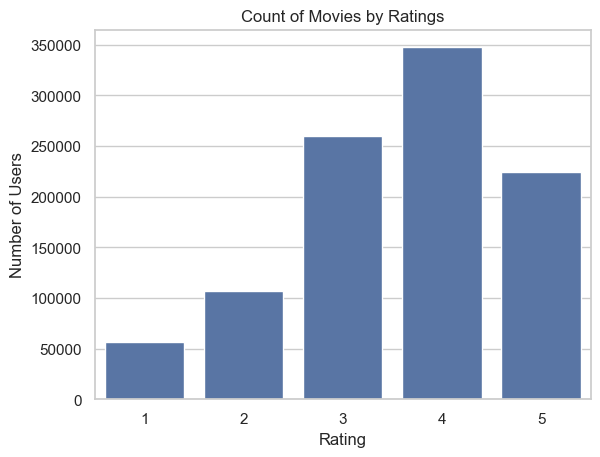

In [41]:
# count plot of movies by ratings
sns.countplot(x = "rating", data = df)
plt.xlabel("Rating")
plt.ylabel("Number of Users")
plt.title("Count of Movies by Ratings")
plt.savefig("../artifacts/count_plot_of_movies_by_ratings.png")
plt.show()

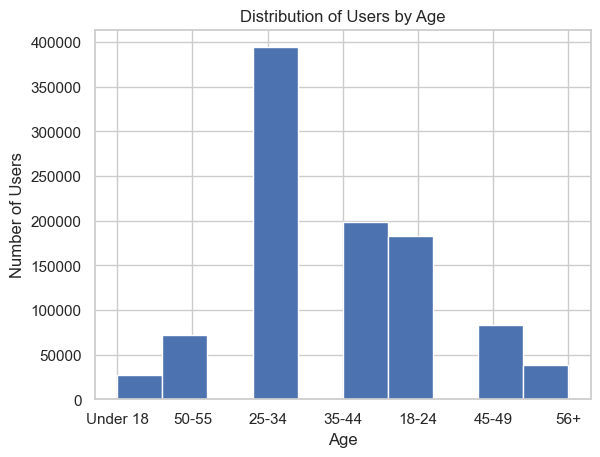

In [42]:
# distribution of users by age
df["age"].hist()
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.title("Distribution of Users by Age")
plt.savefig("../artifacts/distribution_of_users_by_age.png")
plt.show()

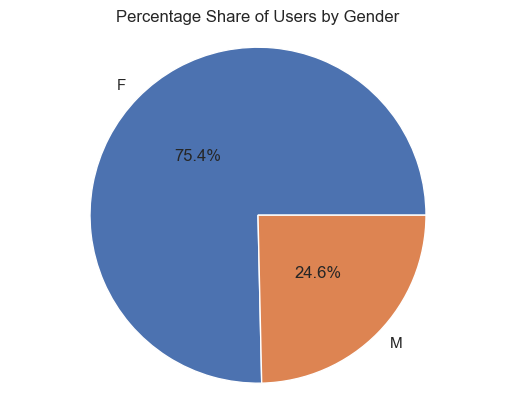

In [43]:
# percentage share of users by gender
plt.pie(df["gender"].value_counts().values, center = (0, 0), labels = df["gender"].unique(), autopct = "%1.1f%%", pctdistance = 0.5)
plt.title("Percentage Share of Users by Gender")
plt.axis("equal")
plt.savefig("../artifacts/percentage_share_of_users_by_gender.png")
plt.show()

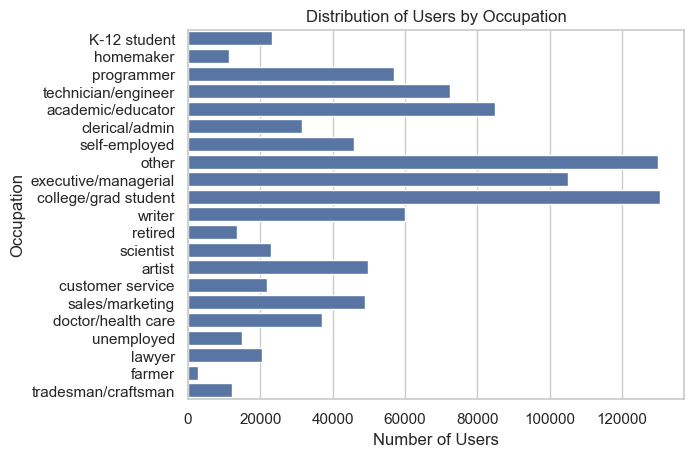

In [44]:
# distribution of users by occupation
sns.countplot(y = "occupation", data = df)
plt.xlabel("Number of Users")
plt.ylabel("Occupation")
plt.title("Distribution of Users by Occupation")
plt.savefig("../artifacts/distribution_of_users_by_occupation.png")
plt.show()

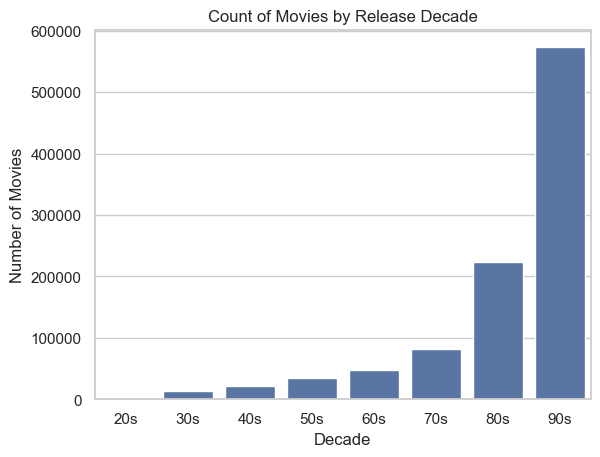

In [45]:
# count of movies by release decade
sns.countplot(x = "release_decade", data = df)
plt.xlabel("Decade")
plt.ylabel("Number of Movies")
plt.title("Count of Movies by Release Decade")
plt.savefig("../artifacts/count_of_movies_by_release_decade.png")
plt.show()

In [46]:
# grouping the data according to the average rating and number of users

In [47]:
# average rating
df.groupby("title")["rating"].mean().sort_values(ascending = False).head(20)

title
Baby, The                             5.000000
Gate of Heavenly Peace, The           5.000000
Lured                                 5.000000
Ulysses (Ulisse)                      5.000000
Schlafes Bruder (Brother of Sleep)    5.000000
Song of Freedom                       5.000000
One Little Indian                     5.000000
Follow the Bitch                      5.000000
Bittersweet Motel                     5.000000
Smashing Time                         5.000000
I Am Cuba (Soy Cuba/Ya Kuba)          4.800000
Lamerica                              4.750000
Apple, The (Sib)                      4.666667
Sanjuro                               4.608696
Shawshank Redemption, The             4.554558
Godfather, The                        4.524966
Close Shave, A                        4.520548
Usual Suspects, The                   4.517106
Schindler's List                      4.510417
Wrong Trousers, The                   4.507937
Name: rating, dtype: float64

In [48]:
# number of ratings
df.groupby("title")["rating"].count().sort_values(ascending = False).head(20)

title
American Beauty                                   3428
Star Wars: Episode IV - A New Hope                2991
Star Wars: Episode V - The Empire Strikes Back    2990
Star Wars: Episode VI - Return of the Jedi        2883
Jurassic Park                                     2672
Saving Private Ryan                               2653
Terminator 2: Judgment Day                        2649
Matrix, The                                       2590
Back to the Future                                2583
Silence of the Lambs, The                         2578
Men in Black                                      2538
Raiders of the Lost Ark                           2514
Fargo                                             2513
Sixth Sense, The                                  2459
Braveheart                                        2443
Shakespeare in Love                               2369
Princess Bride, The                               2318
Schindler's List                                  2304
L.A.

In [49]:
# creating a DataFrame with average rating and number of ratings as columns
df_grouped = pd.DataFrame(df.groupby("title")["rating"].agg([("average_rating", "mean")]))
df_grouped["number_of_ratings"] = pd.DataFrame(df.groupby("title")["rating"].count())
df_grouped.reset_index(inplace = True)
df_grouped.sample(20)

title  average_rating  \
2970                                    Sleeping Beauty        3.710372   
2353                                              North        2.492754   
453                                         Blue Velvet        3.762997   
2603                               Prince of Tides, The        3.155763   
1860  Last of the High Kings, The (a.k.a. Summer Fling)        3.000000   
2739                                        Richard III        3.958678   
2071                                            Matilda        3.477064   
1110                       Fast Times at Ridgemont High        3.837472   
373                                                 Big        3.855801   
2160                                       Modern Times        4.236066   
2895                                        Shadowlands        3.835664   
2320                            Night at the Roxbury, A        2.381944   
1225                           Free Willy 3: The Rescue        1.738462   
2494                                     Penny Serenade        3.550000   
2409                                    One Night Stand        2.538462   
299                                      Batman Forever        2.642214   
2025                            Man Without a Face, The        3.316038   
2329     Nightmare on Elm Street 4: The Dream Master, A        2.239669   
3435                                        Up in Smoke        3.476415   
3289                                         Thumbelina        2.651163   

      number_of_ratings  
2970                511  
2353                 69  
453                 654  
2603                321  
1860                  1  
2739                242  
2071                218  
1110                886  
373                1491  
2160                305  
2895                286  
2320                144  
1225                 65  
2494                 40  
2409                 39  
299                 777  
2025                212  
2329                242  
3435                212  
3289                 43

In [50]:
# building a recommender system based on pearson correlation

In [51]:
# creating a pivot table of movie titles and user id and imputing the NaN values
pivot_table = pd.pivot_table(df, index = "user_id", columns = "title", values = "rating", aggfunc = "mean")
# imputing the NaN with 0
pivot_table.fillna(0, inplace = True)
pivot_table.head()

title    $1,000,000 Duck  'Night Mother  'Til There Was You  'burbs, The  \
user_id                                                                    
1                    0.0            0.0                 0.0          0.0   
10                   0.0            0.0                 0.0          4.0   
100                  0.0            0.0                 0.0          0.0   
1000                 0.0            0.0                 0.0          0.0   
1001                 0.0            0.0                 0.0          0.0   

title    ...And Justice for All  1-900  10 Things I Hate About You  \
user_id                                                              
1                           0.0    0.0                         0.0   
10                          0.0    0.0                         0.0   
100                         0.0    0.0                         0.0   
1000                        0.0    0.0                         0.0   
1001                        0.0    0.0                         0.0   

title    101 Dalmatians  12 Angry Men  13th Warrior, The  187  \
user_id                                                         
1                   0.0           0.0                0.0  0.0   
10                  0.0           3.0                4.0  0.0   
100                 0.0           0.0                0.0  0.0   
1000                4.0           0.0                0.0  0.0   
1001                3.0           0.0                0.0  0.0   

title    2 Days in the Valley  20 Dates  20,000 Leagues Under the Sea  \
user_id                                                                 
1                         0.0       0.0                           0.0   
10                        0.0       0.0                           4.0   
100                       0.0       0.0                           0.0   
1000                      0.0       0.0                           0.0   
1001                      0.0       0.0                           0.0   

title    200 Cigarettes  2001: A Space Odyssey  2010  24 7: Twenty Four Seven  \
user_id                                                                         
1                   0.0                    0.0   0.0                      0.0   
10                  0.0                    3.0   0.0                      0.0   
100                 0.0                    4.0   0.0                      0.0   
1000                0.0                    0.0   0.0                      0.0   
1001                1.0                    0.0   0.0                      0.0   

title    24-hour Woman  28 Days  3 Ninjas: High Noon On Mega Mountain  \
user_id                                                                 
1                  0.0      0.0                                   0.0   
10                 0.0      0.0                                   0.0   
100                0.0      0.0                                   0.0   
1000               0.0      0.0                                   0.0   
1001               0.0      0.0                                   0.0   

title    3 Strikes  301, 302  39 Steps, The  \
user_id                                       
1              0.0       0.0            0.0   
10             0.0       0.0            0.0   
100            0.0       0.0            0.0   
1000           0.0       0.0            0.0   
1001           0.0       0.0            0.0   

title    400 Blows, The (Les Quatre cents coups)  42 Up  52 Pick-Up   54  \
user_id                                                                    
1                                            0.0    0.0         0.0  0.0   
10                                           0.0    0.0         0.0  0.0   
100                                          0.0    0.0         0.0  0.0   
1000                                         0.0    0.0         0.0  0.0   
1001                                         0.0    0.0         0.0  2.0   

title    7th Voyage of Sinbad, The  8 1/2  8 1/2 Women  \
user_id

In [52]:
pivot_table.shape

(6040, 3637)

In [53]:
# using item-based approach to create a simple recommender system that uses pearson correlation
# test movies names: "Chariots of Fire", "Mission: Impossible", "Jungle Book, The", "Rush Hour", "Liar Liar"
movie_name = input("Enter a Movie Name: ")
print(f"The Entered Movie Name: {movie_name}")
print()
print(f"Movies Similar to {movie_name}:")
movie_rating = pivot_table[movie_name]
similar_movies = pivot_table.corrwith(movie_rating)
similar_movies_df = pd.DataFrame(similar_movies, columns = ["correlation"])
similar_movies_df.sort_values("correlation", ascending = False, inplace = True)
similar_movies_df.iloc[1:, :].head(10)

The Entered Movie Name: Liar Liar

Movies Similar to Liar Liar:


correlation
title                                                   
Mrs. Doubtfire                                  0.499927
Dumb & Dumber                                   0.459601
Ace Ventura: Pet Detective                      0.458654
Home Alone                                      0.455967
Wedding Singer, The                             0.429222
Wayne's World                                   0.424552
Cable Guy, The                                  0.420942
Tommy Boy                                       0.413143
Austin Powers: International Man of Mystery     0.411105
Brady Bunch Movie, The                          0.409281

In [54]:
# building a recommender system based on cosine similarity

In [55]:
# printing the user similarity matrix and item similarity matrix

# user similarity matrix
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(pivot_table)
user_similarity_matrix = pd.DataFrame(user_similarity, index = pivot_table.index, columns = pivot_table.index)
user_similarity_matrix.head()

user_id         1        10       100      1000      1001      1002      1003  \
user_id                                                                         
1        1.000000  0.255319  0.123967  0.207800  0.139317  0.110320  0.121384   
10       0.255319  1.000000  0.259645  0.280479  0.158703  0.112917  0.141985   
100      0.123967  0.259645  1.000000  0.306067  0.075736  0.110450  0.358686   
1000     0.207800  0.280479  0.306067  1.000000  0.099117  0.047677  0.201722   
1001     0.139317  0.158703  0.075736  0.099117  1.000000  0.164854  0.053887   

user_id      1004      1005      1006      1007      1008      1009       101  \
user_id                                                                         
1        0.180226  0.103896  0.052816  0.060032  0.102675  0.049839  0.029990   
10       0.432536  0.194915  0.102487  0.161729  0.220798  0.118062  0.205438   
100      0.237492  0.172872  0.099147  0.060103  0.043367  0.061238  0.347549   
1000     0.355920  0.325966  0.130702  0.042828  0.077724  0.123638  0.282423   
1001     0.150196  0.138602  0.134710  0.019576  0.083651  0.200411  0.067900   

user_id      1010      1011      1012      1013      1014      1015      1016  \
user_id                                                                         
1        0.159501  0.078094  0.080898  0.048064  0.200658  0.176683  0.133068   
10       0.352071  0.199990  0.153074  0.157664  0.162204  0.391170  0.202787   
100      0.264241  0.139793  0.085678  0.024361  0.299175  0.197008  0.171399   
1000     0.249464  0.124237  0.117258  0.051113  0.184220  0.218869  0.090369   
1001     0.254713  0.072502  0.037462  0.074058  0.061130  0.302353  0.294693   

user_id      1017      1018      1019       102      1020      1021      1022  \
user_id                                                                         
1        0.150068  0.178819  0.112961  0.120931  0.034848  0.090596  0.122459   
10       0.291890  0.241407  0.334742  0.157045  0.107754  0.191597  0.114071   
100      0.145446  0.337496  0.193436  0.009203  0.176147  0.196647  0.070161   
1000     0.197800  0.364062  0.202145  0.103617  0.141890  0.171426  0.056812   
1001     0.102895  0.065421  0.170032  0.175747  0.154303  0.095086  0.271557   

user_id      1023      1024      1025      1026      1027      1028      1029  \
user_id                                                                         
1        0.099425  0.022982  0.028506  0.004729  0.143985  0.045708  0.189412   
10       0.127724  0.137328  0.082708  0.044570  0.147580  0.083720  0.299691   
100      0.087403  0.066152  0.070635  0.031957  0.211235  0.098388  0.156808   
1000     0.051577  0.018445  0.115536  0.029414  0.152463  0.069294  0.222517   
1001     0.048803  0.066380  0.120113  0.126395  0.077109  0.045568  0.155573   

user_id       103      1030      1031      1032      1033      1034      1035  \
user_id                                                                         
1        0.032611  0.045869  0.058103  0.181461  0.031990  0.190718  0.136573   
10       0.153746  0.236860  0.270080  0.228038  0.199773  0.332576  0.125432   
100      0.223646  0.400578  0.389815  0.092417  0.141872  0.163863  0.222814   
1000     0.167508  0.341998  0.323900  0.143107  0.128909  0.230978  0.130871   
1001     0.098443  0.088632  0.082086  0.233205  0.103108  0.145983  0.100987   

user_id      1036      1037      1038      1039       104      1040      1041  \
user_id                                                                         
1        0.136320  0.022805  0.179369  0.030367  0.047547  0.174466  0.045860   
10       0.168849  0.048466  0.176147  0.062433  0.086865  0.332678  0.071434   
100      0.189875  0.046555  0.129770  0.000000  0.030602  0.226697  0.082092   
1000     0.131125  0.059484  0.089844  0.000000  0.067599  0.230231  0.041408   
1001     0.076352  0.201982  0.159740  0.080370  0.130431  0.130524  0.083778   

user_id      1042      1

In [56]:
# item similarity matrix
from sklearn.metrics.pairwise import cosine_similarity

item_similarity = cosine_similarity(pivot_table.T)
item_similarity_matrix = pd.DataFrame(item_similarity, index = pivot_table.columns,  columns = pivot_table.columns)
item_similarity_matrix

title                                $1,000,000 Duck  'Night Mother  \
title                                                                 
$1,000,000 Duck                             1.000000       0.072357   
'Night Mother                               0.072357       1.000000   
'Til There Was You                          0.037011       0.115290   
'burbs, The                                 0.079291       0.115545   
...And Justice for All                      0.060838       0.159526   
...                                              ...            ...   
Zed & Two Noughts, A                        0.045280       0.091150   
Zero Effect                                 0.039395       0.074787   
Zero Kelvin (Kjærlighetens kjøtere)         0.000000       0.000000   
Zeus and Roxanne                            0.120242       0.000000   
eXistenZ                                    0.027003       0.077807   

title                                'Til There Was You  'burbs, The  \
title                                                                  
$1,000,000 Duck                                0.037011     0.079291   
'Night Mother                                  0.115290     0.115545   
'Til There Was You                             1.000000     0.098756   
'burbs, The                                    0.098756     1.000000   
...And Justice for All                         0.066301     0.143620   
...                                                 ...          ...   
Zed & Two Noughts, A                           0.022594     0.055704   
Zero Effect                                    0.079261     0.161174   
Zero Kelvin (Kjærlighetens kjøtere)            0.000000     0.000000   
Zeus and Roxanne                               0.047526     0.033567   
eXistenZ                                       0.063284     0.110525   

title                                ...And Justice for All     1-900  \
title                                                                   
$1,000,000 Duck                                    0.060838  0.000000   
'Night Mother                                      0.159526  0.000000   
'Til There Was You                                 0.066301  0.080250   
'burbs, The                                        0.143620  0.000000   
...And Justice for All                             1.000000  0.000000   
...                                                     ...       ...   
Zed & Two Noughts, A                               0.086080  0.000000   
Zero Effect                                        0.110867  0.000000   
Zero Kelvin (Kjærlighetens kjøtere)                0.074317  0.000000   
Zeus and Roxanne                                   0.000000  0.000000   
eXistenZ                                           0.111040  0.039561   

title                                10 Things I Hate About You  \
title                                                             
$1,000,000 Duck                                        0.058619   
'Night Mother                                          0.076798   
'Til There Was You                                     0.127895   
'burbs, The                                            0.192191   
...And Justice for All                                 0.075093   
...                                                         ...   
Zed & Two Noughts, A                                   0.012702   
Zero Effect                                            0.175771   
Zero Kelvin (Kjærlighetens kjøtere)                    0.000000   
Zeus and Roxanne                                       0.058708   
eXistenZ                                               0.162060   

title                                101 Dalmatians  12 Angry Men  \
title                                                               
$1,000,000 Duck                            0.189843      0.094785   
'Night Mother                              0.137135      0.111413   
'Til There Was You                       

In [57]:
# using the item-based approach to create a recommender system that uses nearest neighbors algorithm and cosine similarity

# creating a sparse matrix
from scipy.sparse import csr_matrix

sparse_matrix = csr_matrix(pivot_table.T.values)
sparse_matrix

<3637x6040 sparse matrix of type '<class 'numpy.float64'>'
	with 992975 stored elements in Compressed Sparse Row format>

In [58]:
# fitting the nearest neighbor model with cosine similarity as the distance metric
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(n_neighbors = 5, metric = "cosine", n_jobs = -1)
model.fit(sparse_matrix)

NearestNeighbors(metric='cosine', n_jobs=-1)

In [ ]:
# saving the model into a .pkl file
import pickle

with open("../artifacts/recommender_system_cosine_similarity.pkl", "wb") as file:
    pickle.dump(model, file)

In [60]:
# generating recommendations
# test movies names: "Chariots of Fire", "Mission: Impossible", "Jungle Book, The", "Rush Hour", "Liar Liar"
movie_name = input("Enter a Movie Name: ")
print(f"The Entered Movie Name: {movie_name}")
print()
print(f"Movies Similar to {movie_name}:")
distances, indices = model.kneighbors(pivot_table[movie_name].values.reshape(1, -1), n_neighbors = 11)
recommendations = pd.DataFrame(columns = ["rank", "movie", "distance"])
for i in range(0, len(distances.flatten())):
    if i == 0:
        continue
    new_row = pd.DataFrame({"rank": [i], "movie": [pivot_table.columns[indices.flatten()[i]]], "distance": [distances.flatten()[i]]})
    recommendations = pd.concat([recommendations, new_row], ignore_index = True)

recommendations

The Entered Movie Name: Liar Liar

Movies Similar to Liar Liar:


rank                                        movie  distance
0    1                               Mrs. Doubtfire  0.442933
1    2                   Ace Ventura: Pet Detective  0.483139
2    3                                Dumb & Dumber  0.487415
3    4                                   Home Alone  0.488796
4    5                                Wayne's World  0.500632
5    6                          Wedding Singer, The  0.502924
6    7  Austin Powers: International Man of Mystery  0.510527
7    8                 There's Something About Mary  0.516737
8    9                       League of Their Own, A  0.517926
9   10                                    Mask, The  0.531043